RITWEEK Raj, 14/11/2021

DIGITAL ASSIGNMENT -1


THEORY OF COMPUTATION AND COMPILER DESIGN
        [CSE-2002 ]
        SLOT - A2

School of Computer Science and Engineering (scope)
 		
FALL SEMESTER -2020-21

RITWEEK RAJ
19BCE0597






In [1]:
import glob
import nltk
import spacy
import os
import string
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir(r'/content/drive/MyDrive/NLP-NER-DAG-master/dataset')  #don't remove r and give extra space
myFiles = glob.glob('*.txt')
# print(myFiles)  #prints text file names

In [4]:
dict_words={}
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# TOKENIZING THE CORPUS

In [5]:
for filename in myFiles:
    # print(filename)
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word 
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    words=list(set(words))
    dict_words[filename]=words
    words=[]
    file.close()

#print(dict_words)

In [6]:
B = pd.read_csv('/content/drive/MyDrive/NLP-NER-DAG-master/BlacklistedFile1.csv')
#print(B)

value=B['Index'].tolist()
key=B['Sensitivity'].tolist()

#print(value)
#print(key)

In [7]:
Ref_dict=dict(zip(value,key))
#print(Ref_dict)      #Data Dictionary


# Clustering
less_sensitive=[]
avg_sensitive=[]
high_sensitive=[]

for name, words in dict_words.items():
    max=0
    for x in words:
        if(max==3):
            break
        for value, key in Ref_dict.items():
            if(x==value):
                if(max<key):
                    max=int(key)
                if(max==3):
                    print(name,"has High Senstive data")
                    high_sensitive.append(name)
                    break
    if(max==0):
        print(name,"has No Sensitive data")
    if(max==1):
        print(name,"has Less Sensitive data")
        less_sensitive.append(name)
    if(max==2):
        print(name,"has Average Sensitive data")
        avg_sensitive.append(name)
                
print()
print("CLUSTER LESS-SENSITIVE:",less_sensitive)
print("CLUSTER AVG-SENSITIVE:",avg_sensitive)
print("CLUSTER HIGH-SENSITIVE:",high_sensitive)

031-bullyinharvardyardwhatprofesso.txt has High Senstive data
109.txt has High Senstive data
015-areyoudrinkingbecauseyourework.txt has High Senstive data
056-ciainterrogationsreportnewcong.txt has High Senstive data
072-doreallyneedtocancelchristmas.txt has Average Sensitive data
120.txt has High Senstive data
082-feaststephenmiddleeastpersecut.txt has High Senstive data
096-generalelectionpartyleaderssho.txt has Average Sensitive data
119-immigrationdebatewhatuscouldle.txt has Average Sensitive data
117.txt has High Senstive data
086-fivereasonswhyeuropeancentralb.txt has Less Sensitive data
013-anxiousbritainsuccourtvleadere.txt has Average Sensitive data
001-2015beyondobamanewcongressneed.txt has High Senstive data
092-freedomoffencecharliehebdois.txt has High Senstive data
11.txt has High Senstive data
120-immigrationpopulationgrowthlon.txt has High Senstive data
065-cubafacehistoricalparenthes.txt has Less Sensitive data
087-fivewaysobamacouldmakecastropa.txt has High Senstive da

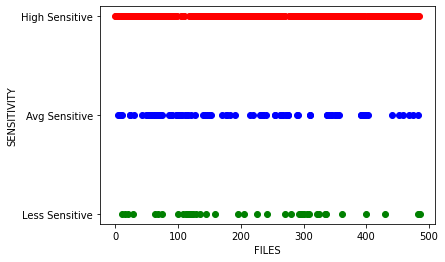

In [ ]:
x=[i for i in range(len(myFiles))]
y=[]
for i in x:
    if(myFiles[i] in less_sensitive):
        y.append(1)
    elif(myFiles[i] in avg_sensitive):
        y.append(2)
    elif(myFiles[i] in high_sensitive):
        y.append(3)
    else:
        y.append(None)
plt.yticks([1,2,3],["Less Sensitive","Avg Sensitive","High Sensitive"])
# plt.xticks(rotation=45, ha='right')
plt.ylabel("SENSITIVITY")
plt.xlabel("FILES")
for i in range(0,len(x)):
    if(y[i]==3):
        plt.scatter(x[i],y[i],color="red")
    if(y[i]==2):
        plt.scatter(x[i],y[i],color="blue")
    if(y[i]==1):
        plt.scatter(x[i],y[i],color="green")

## IMPORTING REQUIREMENTS FOR FURTHER STEPS

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree,tree2conlltags
from pprint import pprint
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def preprocess(sent):
    sent = word_tokenize(sent)
    sent = pos_tag(sent)
    return sent
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score



# CYBER SECURITY DICTIONARY

In [ ]:
# Define dictionary with related to cyber security and digital forensic domains.
all_terms = ['access control', 'anti-virus', 'anti-malware', 'antivirus software', 'apt', 'advanced persistent threat', 'asset', 
            'authentication', 'authorization', 'backing up', 'bcp', 'business continuity planning', 'behavior monitoring',
            'blacklist', 'block cipher', 'botnet', 'bug', 'byod', 'bring your own device', 'ciphertext', 'clickjacking', 'cloud computing',
            'cnd', 'computer network defense', 'cracker', 'critical infrastructure', 'cve', 'common vulnerabilities and exposures',
            'cryptography', 'cyberattack', 'cyber ecosystem', 'cyberespionage', 'cybersecurity', 'cyber teams', 'data breach',
            'data integrity', 'data mining', 'data theft', 'ddos attack', 'distributed denial of service attack', 'decrypt',
            'digital certificate', 'digital forensics', 'dlp', 'data loss prevention', 'dmz', 'demilitarized zone', 'dos',
            'denial of service', 'drive-by download', 'eavesdropping', 'encode', 'encryption key', 'firewall', 'hacker', 'hacktivism',
            'honeypot', 'iaas', 'infrastructure-as-a-service', 'identity cloning', 'identity fraud', 'ids', 'intrusion detection system',
            'information security policy', 'insider threat', 'ips', 'intrusion prevention system', 'isp', 'internet service provider',
            'jboh', 'javascript-binding-over-http', 'keylogger', 'lan', 'local area network', 'link jacking', 'malware', 'malicious software',
            'outsider threat', 'outsourcing', 'owasp', 'open web application security project', 'paas', 'platform-as-a-service',
            'packet sniffing', 'patch', 'patch management', 'payment card skimmers', 'pen testing', 'phishing', 'pki', 'public key infrastructure',
            'pos intrusions', 'point of sale intrusions', 'ransomware', 'restore', 'risk assessment', 'risk management', 'saas',
            'software-as-a-service', 'sandboxing', 'scada', 'supervisory control and data acquisition', 'security control',
            'security perimeter', 'siem', 'security information and event management', 'sniffing', 'social engineering', 'spam',
            'spear phishing', 'spoof', 'spoofing', 'spyware', 'supply chain', 'threat assessment', 'trojan horse', 'trojan',
            'two-factor authentication', 'two-step authentication', 'unauthorized access', 'vpn', 'virtual private network',
            'virus', 'vishing', 'vulnerability', 'whitelist', 'wi-fi', 'worm', 'zombie']

In [ ]:
# Performing dictionary look up on the sentences stored in the dataset containing terms defined in our dictionary.
def process_review(review):
    processed_token = []
    for token in review.split():
        token = ''.join(e.lower() for e in token if e.isalnum())
        processed_token.append(token)
    return ' '.join(processed_token)

def find_terms(text):
    terms = []
    review = process_review(text)
    for token in review.split():
      if token in all_terms:
        terms.append(token) 
    return terms

# PREPROCESSING THE CORPUS

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Lemmatizing the File:Token dictionary
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

preproc = {}

for fil,ls in dict_words.items():
    for i in range(len(ls)):
        ls[i] = lemmatizer.lemmatize(ls[i])
    preproc[fil] = ' '.join(ls)

In [ ]:
corpus = pd.DataFrame.from_dict(preproc, orient = 'index')
corpus.reset_index(level = 0, inplace = True)
corpus.columns = ['File', 'TokensLemmas']
corpus['LookUpCBS'] = corpus['TokensLemmas'].apply(find_terms)
corpus['Sensitivity'] = y
# df1 = corpus[corpus.isna().any(axis=1)]
# df1
# corpus.dropna(inplace = True)
corpus

,File,TokensLemmas,LookUpCBS,Sensitivity
0,031-bullyinharvardyardwhatprofesso.txt,grownup duan get parent understanding garden h...,[],3.0
1,109.txt,application play human nlp stronger threat ple...,[cybersecurity],3.0
2,015-areyoudrinkingbecauseyourework.txt,rate public exception medical deliver research...,[],3.0
3,056-ciainterrogationsreportnewcong.txt,public men officer national indicted dershowit...,[],3.0
4,072-doreallyneedtocancelchristmas.txt,need cancelling opportunity stockingswhile rig...,[],2.0
...,...,...,...,...
481,66.txt,previously lease affiliate fully file reported...,"[cyberattack, hacker, cybersecurity, ransomware]",3.0
482,260-turkeyredlinefreespeechcen.txt,school describe tantamount impose label order ...,[],2.0
483,261-tvdebatesbroadcastersdavidcame.txt,alex opportunity ukip cameron right empty publ...,[],1.0
484,278-whatfreedomspeech.txt,right order public generally proclaimed worker...,[],3.0


In [ ]:
# for i in range(len(corpus)):
#     if len(corpus.loc[i,'LookUpCBS'])!=0:
#       print(corpus.loc[i,'LookUpCBS'])

In [ ]:
def file_type(matches):
    if len(matches) <= 1:
        return 0 # not related to cyber security
    else:
        return 1 # related to cyber security
    
corpus['FileType'] = corpus['LookUpCBS'].apply(file_type)
corpus

,File,TokensLemmas,LookUpCBS,Sensitivity,FileType
0,031-bullyinharvardyardwhatprofesso.txt,grownup duan get parent understanding garden h...,[],3.0,0
1,109.txt,application play human nlp stronger threat ple...,[cybersecurity],3.0,0
2,015-areyoudrinkingbecauseyourework.txt,rate public exception medical deliver research...,[],3.0,0
3,056-ciainterrogationsreportnewcong.txt,public men officer national indicted dershowit...,[],3.0,0
4,072-doreallyneedtocancelchristmas.txt,need cancelling opportunity stockingswhile rig...,[],2.0,0
...,...,...,...,...,...
481,66.txt,previously lease affiliate fully file reported...,"[cyberattack, hacker, cybersecurity, ransomware]",3.0,1
482,260-turkeyredlinefreespeechcen.txt,school describe tantamount impose label order ...,[],2.0,0
483,261-tvdebatesbroadcastersdavidcame.txt,alex opportunity ukip cameron right empty publ...,[],1.0,0
484,278-whatfreedomspeech.txt,right order public generally proclaimed worker...,[],3.0,0


# SUPPORT VECTOR MACHINE

### SVM USING SENSITIVITY CLUSTER FROM BLACKLISTEDFILE1.CSV

### SVM ON FILE TYPE EVALUATED BY DICTIONARY LOOKUP AGAINST KEYWORDS

In [ ]:
sensitive = pd.DataFrame(columns=['CyberSecurityFile', 'Content', 'Match'])
unsensitive = pd.DataFrame(columns=['NonCyberSecFile', 'Content'])
row_list1 = []
row_list2 = []

for i in range(len(corpus)):
    if len(corpus.loc[i,'LookUpCBS'])>1:
      row_list1.append({'CyberSecurityFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas'],
                       'Match':corpus.loc[i,'LookUpCBS']})
    else:
      row_list2.append({'NonCyberSecFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas']})
sensitive = pd.DataFrame(row_list1)
unsensitive = pd.DataFrame(row_list2)

In [ ]:
sensitive.head()

,CyberSecurityFile,Content,Match
0,120.txt,served vulnerability worker related accessed p...,"[vulnerability, phishing, cyberattack, cyberse..."
1,117.txt,vulnerability need opportunity frontline resea...,"[vulnerability, vulnerability, patch, malware,..."
2,086-fivereasonswhyeuropeancentralb.txt,intended boosting purchase need enjoys bank bu...,"[asset, restore]"
3,11.txt,vulnerability deputy purchase pulled revil dis...,"[vulnerability, malware, hacker, cybersecurity..."
4,123.txt,vulnerability make disclosure displayed chaine...,"[vulnerability, vulnerability, authentication,..."


In [ ]:
unsensitive.head()

,NonCyberSecFile,Content
0,031-bullyinharvardyardwhatprofesso.txt,grownup duan get parent understanding garden h...
1,109.txt,application play human nlp stronger threat ple...
2,015-areyoudrinkingbecauseyourework.txt,rate public exception medical deliver research...
3,056-ciainterrogationsreportnewcong.txt,public men officer national indicted dershowit...
4,072-doreallyneedtocancelchristmas.txt,need cancelling opportunity stockingswhile rig...


# PART OF SENTENCE TAGGING AND TAG TREES

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree,tree2conlltags
from pprint import pprint
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def preprocess(sent):
    sent = word_tokenize(sent)
    sent = pos_tag(sent)
    return sent

In [ ]:
sensitive.shape

(174, 3)

In [ ]:
# UNCOMMENT AND RUN LATER -- TAKES A LOT OF TIME

for filename in sensitive['CyberSecurityFile']:
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    sent = preprocess(text)
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(sent)
    iob_tagged = tree2conlltags(cs)
    # pprint(iob_tagged)
    ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
    doc=nlp(text)
    # pprint([(X.text, X.label_) for X in doc.ents])
    # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
    len(doc.ents)
    labels = [x.label_ for x in doc.ents]
    Counter(labels)
    items = [x.text for x in doc.ents]
    print(Counter(items).most_common(3))
    
    sentences = [x for x in doc.sents]
    ttemp = len(sentences) - 1
    displacy.render(nlp(str(sentences[ttemp])),jupyter=True, style='ent')
    displacy.render(nlp(str(sentences[ttemp])), style='dep', jupyter = True, options = {'distance': 120})
    
    [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[ttemp])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
    dict([(str(x), x.label_) for x in nlp(str(sentences[ttemp])).ents])
    print([(x, x.ent_iob_, x.ent_type_) for x in sentences[ttemp]])
    file.close()

[('Service NSW', 7), ('47', 2), ('Australian', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('McAfee', 5), ('US', 3), ('Atlas VPN', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ECB', 5), ('Fed', 4), ('Greece', 4)]


[(In, 'O', ''), (the, 'O', ''), (end, 'O', ''), (,, 'O', ''), (the, 'O', ''), (EU, 'B', 'ORG'), (and, 'O', ''), (ECB, 'B', 'ORG'), (lacks, 'O', ''), (what, 'O', ''), (the, 'O', ''), (Fed, 'B', 'ORG'), (enjoys, 'O', ''), (--, 'O', ''), (the, 'O', ''), (punch, 'O', ''), (of, 'O', ''), (a, 'O', ''), (national, 'O', ''), (government, 'O', ''), (that, 'O', ''), (ran, 'O', ''), (large, 'O', ''), (deficits, 'O', ''), (to, 'O', ''), (augment, 'O', ''), (its, 'O', ''), (efforts, 'O', ''), (to, 'O', ''), (pull, 'O', ''), (the, 'O', ''), (U.S, 'B', 'GPE'), ( , 'O', ''), (economy, 'O', ''), (out, 'O', ''), (of, 'O', ''), (recession, 'O', ''), (and, 'O', ''), (national, 'O', ''), (credit, 'O', ''), (,, 'O', ''), (housing, 'O', ''), (and, 'O', ''), (labor, 'O', ''), (markets, 'O', ''), (that, 'O', ''), (made, 'O', ''), (monetary, 'O', ''), (policies, 'O', ''), (--, 'O', ''), (like, 'O', ''), (QE, 'O', ''), (--, 'O', ''), (reasonably, 'O', ''), (effective, 'O', ''), (., 'O', '')]
[('REvil', 7), ('Kas

[(He, 'O', ''), (said, 'O', ''), (REvil, 'B', 'PERSON'), (preferred, 'O', ''), (to, 'O', ''), (use, 'O', ''), (Monero, 'B', 'PERSON'), (,, 'O', ''), (but, 'O', ''), (it, 'O', ''), (would, 'O', ''), (be, 'O', ''), (difficult, 'O', ''), (to, 'O', ''), (purchase, 'O', ''), ($, 'B', 'MONEY'), (70, 'I', 'MONEY'), (m, 'I', 'MONEY'), (of, 'O', ''), (the, 'O', ''), (currency, 'O', ''), (for, 'O', ''), (practical, 'O', ''), (and, 'O', ''), (regulatory, 'O', ''), (reasons, 'O', ''), (., 'O', ''), (

, 'O', '')]
[('QNAP', 7), ('Huang', 6), ('NAS', 4)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Robinson', 9), ('Antinalysis', 6), ('Poly Network', 3)]


[(He, 'O', ''), (also, 'O', ''), (has, 'O', ''), (contributed, 'O', ''), (to, 'O', ''), (Forbes.com, 'B', 'ORG'), (,, 'O', ''), (TheStreet, 'O', ''), (and, 'O', ''), (Mainstreet, 'O', ''), (., 'O', ''), (

   


 , 'O', '')]
[('Salt', 6), ('Digicert', 2), ('The Daily Swig', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Unacademy', 8), ('around 11 million', 2), ('The Daily Swig', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('third', 2), ('Lookout Threat Lab', 2), ('zero', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Banner Health', 6), ('2016', 2), ('US', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Army', 8), ('Berry', 5), ('Chaplain Lawhorn', 4)]


[(I, 'O', ''), (find, 'O', ''), (it, 'O', ''), (both, 'O', ''), (repulsive, 'O', ''), (and, 'O', ''), (heartbreaking, 'O', ''), (to, 'O', ''), (know, 'O', ''), (that, 'O', ''), (we, 'O', ''), (have, 'O', ''), (a, 'O', ''), (military, 'O', ''), (that, 'O', ''), (frowns, 'O', ''), (upon, 'O', ''), (a, 'O', ''), (chaplain, 'O', ''), (using, 'O', ''), (a, 'O', ''), (Bible, 'B', 'WORK_OF_ART'), (to, 'O', ''), (save, 'O', ''), (a, 'O', ''), (soldier, 'O', ''), ('s, 'O', ''), (life, 'O', ''), (., 'O', '')]
[('EU', 7), ('Emsisoft', 3), ('Borrell', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Azure AD', 13), ('Palhière', 5), ('Mollema', 5)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('AdSecure', 5), ('Scareware', 2), ('Malvertisers', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('CPC', 10), ('FPCC', 5), ('Taiwan', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Kaspersky', 5), ('year', 3), ('DDoS', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('IoT', 16), ('IEEE', 14), ('2011', 12)]


[(River, 'O', ''), (Publishers, 'O', ''), (
, 'O', '')]
[('Check Point', 5), ('C&C', 3), ('MDM', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Cameron', 7), ('UK', 6), ('Obama', 5)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Even, 'O', ''), (full, 'O', ''), (government, 'O', ''), (gridlock, 'O', ''), (would, 'O', ''), (be, 'O', ''), (better, 'O', ''), (than, 'O', ''), (that, 'O', ''), (., 'O', '')]
[('NTT', 6), ('2019', 3), ('Verizon', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('London', 11), ('Scotland', 4), ('Murphy', 3)]


[(And, 'O', ''), (some, 'O', ''), (people, 'O', ''), (need, 'O', ''), (to, 'O', ''), (be, 'O', ''), (prepared, 'O', ''), (to, 'O', ''), (stand, 'O', ''), (up, 'O', ''), (for, 'O', ''), (London, 'B', 'GPE'), (in, 'O', ''), (this, 'O', ''), (important, 'O', ''), (debate, 'O', ''), (., 'O', '')]
[('Neustar', 7), ('DNS', 4), ('Akamai', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Delhi', 5), ('Kerala Cyber Warriors', 3), ('Indian', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DUT', 52), ('ICPFuzzer', 33), ('first', 31)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('OS', 20), ('2014', 14), ('EPT', 14)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('ACSC', 5), ('Microsoft Access', 2), ('dozens', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Amtrak', 3), ('weekly', 2), ('May 29, 2020', 1)]


[(You, 'O', ''), (will, 'O', ''), (receive, 'O', ''), (weekly, 'B', 'DATE'), (cybersecurity, 'O', ''), (news, 'O', ''), (soon, 'O', ''), (!, 'O', ''), (
, 'O', '')]
[('2016', 22), ('USA', 17), ('CWE', 16)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Mandia', 6), ('CNBC', 5), ('Colonial Pipeline', 2)]


[(Data, 'B', 'PERSON'), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('Cybereason', 6), ('ICS', 4), ('Barak', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('blockchain', 8), ('bitcoin', 6), ('Satoshi', 3)]


[(If, 'O', ''), (you, 'O', ''), (want, 'O', ''), (to, 'O', ''), (pursue, 'O', ''), (a, 'O', ''), (career, 'O', ''), (in, 'O', ''), (the, 'O', ''), (high, 'O', ''), (-, 'O', ''), (tech, 'O', ''), (and, 'O', ''), (constantly, 'O', ''), (shifting, 'O', ''), (field, 'O', ''), (of, 'O', ''), (cyber, 'O', ''), (security, 'O', ''), (,, 'O', ''), (earning, 'O', ''), (your, 'O', ''), (master, 'O', ''), (’s, 'O', ''), (degree, 'O', ''), (in, 'O', ''), (cyber, 'O', ''), (security, 'O', ''), (can, 'O', ''), (be, 'O', ''), (the, 'O', ''), (first, 'B', 'ORDINAL'), (step, 'O', ''), (toward, 'O', ''), (an, 'O', ''), (impactful, 'O', ''), (career, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('McAfee', 4), ('between January and April', 2), ('Microsoft', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('FBI', 10), ('Bitcoin', 9), ('one', 6)]


[(Become, 'O', ''), (an, 'O', ''), (NPR, 'B', 'ORG'), (sponsor, 'O', ''), (
, 'O', '')]
[('The Daily Swig', 4), ('UK', 4), ('US', 4)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Shodan', 3), ('F5', 2), ('Thursday', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Apache', 3), ('Sonatype', 3), ('Brian Fox', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Malwarebytes', 4), ('recent months', 1), ('roughly five months in 2019', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('2017', 16), ('GAN', 12), ('2014', 9)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Adif', 7), ('Travelex', 4), ('REvil', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ST Engineering', 6), ('Maze', 4), ('US', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('OSS', 128), ('2009', 33), ('2006', 28)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('QAA', 39), ('Toffoli', 28), ('Clifford', 27)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('CONF', 70), ('ESRFuzzer', 42), ('XSS', 32)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Israel', 7), ('India', 5), ('INCD', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Life Healthcare', 5), ('South African', 2), ('dozens', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('2', 21), ('4', 20), ('3', 20)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Java', 8), ('Tycoon', 8), ('BlackBerry', 4)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('2019', 25), ('HTTP', 9), ('2020', 9)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('GGPoker', 7), ('July 20', 3), ('Asian', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ACT', 6), ('Harris', 4), ('ICT', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ICS', 57), ('2019', 16), ('2016', 15)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Mozilla', 5), ('Firefox', 3), ('Firefox Send', 3)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('CMA', 13), ('UK', 10), ('The Daily Swig', 6)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('the weekend', 6), ('Cloudflare', 5), ('HTTP', 4)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('OSS', 53), ('2', 49), ('two', 48)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Valak', 11), ('Cybereason', 3), ('US', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Home Chef', 3), ('US', 2), ('eight million', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Chen', 6), ('algorithm', 5), ('IBM Research', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('SIM', 19), ('one', 4), ('The Daily Swig', 4)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('SIMECK', 25), ('MILP', 23), ('2018', 20)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('2019', 20), ('n.d.', 18), ('2016', 13)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('CNBC', 6), ('Kennedy', 5), ('Colonial', 4)]


[(Data, 'B', 'PERSON'), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('2018', 37), ('SWaT', 32), ('Proc', 32)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('GCNN', 26), ('2018', 17), ('2019', 16)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('iCloud', 5), ('Republican', 4), ('U.S.', 4)]


[(In, 'O', ''), (a, 'O', ''), (similar, 'O', ''), (incident, 'O', ''), (in, 'O', ''), (2008, 'B', 'DATE'), (,, 'O', ''), (Chinese, 'B', 'NORP'), (hackers, 'O', ''), (gained, 'O', ''), (access, 'O', ''), (to, 'O', ''), (campaign, 'O', ''), (documents, 'O', ''), (of, 'O', ''), (Obama, 'B', 'LOC'), (and, 'O', ''), (Republican, 'B', 'NORP'), (candidate, 'O', ''), (,, 'O', ''), (John, 'B', 'PERSON'), (McCain, 'I', 'PERSON'), (., 'O', ''), (
, 'O', '')]
[('FS', 43), ('blockchain', 31), ('SLVP', 29)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Neutron', 46), ('NMT', 30), ('PL', 20)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('IO2BO', 64), ('ELAID', 29), ('KINT', 19)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('PTP', 92), ('2', 32), ('GM', 22)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Deep Learning', 93), ('2018', 81), ('2019', 66)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('WBAN', 26), ('CA', 19), ('HC', 13)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('2019', 13), ('two', 11), ('D-RES', 9)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('2018', 22), ('2016', 18), ('2019', 17)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('WADI', 76), ('SWaT', 63), ('two', 20)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Verkada', 2), ('up to 150,000', 1), ('Jenkins', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(View, 'B', 'ORG'), (Magazine, 'I', 'ORG'), (Archive, 'I', 'ORG'), (
, 'O', '')]
[('LightCom', 68), ('RU', 65), ('PCDD', 30)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('DeepMal', 47), ('CNN', 24), ('1', 17)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Poly Network', 4), ('Binance', 2), ('some $600m', 1)]


[(But, 'O', ''), (losses, 'O', ''), (from, 'O', ''), (crime, 'O', ''), (in, 'O', ''), (the, 'O', ''), (overall, 'O', ''), (cryptocurrency, 'O', ''), (market, 'O', ''), (dropped, 'O', ''), (sharply, 'O', ''), (to, 'O', ''), ($, 'B', 'MONEY'), (681, 'I', 'MONEY'), (m, 'I', 'MONEY'), (,, 'O', ''), (compared, 'O', ''), (to, 'O', ''), ($, 'O', ''), (1.9bn, 'B', 'MONEY'), (for, 'O', ''), (the, 'O', ''), (whole, 'O', ''), (of, 'O', ''), (2020, 'B', 'DATE'), (and, 'O', ''), ($, 'O', ''), (4.5bn, 'B', 'MONEY'), (in, 'O', ''), (2019, 'B', 'DATE'), (., 'O', ''), (

, 'O', '')]
[('iCloud', 5), ('Republican', 4), ('U.S.', 4)]


[(In, 'O', ''), (a, 'O', ''), (similar, 'O', ''), (incident, 'O', ''), (in, 'O', ''), (2008, 'B', 'DATE'), (,, 'O', ''), (Chinese, 'B', 'NORP'), (hackers, 'O', ''), (gained, 'O', ''), (access, 'O', ''), (to, 'O', ''), (campaign, 'O', ''), (documents, 'O', ''), (of, 'O', ''), (Obama, 'B', 'LOC'), (and, 'O', ''), (Republican, 'B', 'NORP'), (candidate, 'O', ''), (,, 'O', ''), (John, 'B', 'PERSON'), (McCain, 'I', 'PERSON'), (., 'O', ''), (
, 'O', '')]
[('SVM', 19), ('2018', 18), ('NBC', 12)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('2019', 10), ('CRF', 9), ('three', 9)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('US', 5), ('Ransomware', 2), ('up to $10 million', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Advertisement, 'O', ''), (
, 'O', '')]
[('Node.js', 2), ('today', 2), ('DNS', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('AVR', 12), ('2015', 10), ('GMP', 9)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Sifu', 49), ('CSC', 41), ('3', 30)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('2018', 33), ('2015', 28), ('IDS', 26)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('CNBC', 6), ('Kennedy', 5), ('Colonial', 4)]


[(Data, 'B', 'PERSON'), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('A}\\', 41), ('Berlin', 19), ('Heidelberg', 19)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('\\dot', 52), ('A}\\', 47), ('GM', 32)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('SCADA', 15), ('CVE', 13), ('2020-07-27', 13)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Rushdie', 6), ('France', 5), ('Charlie Hebdo', 4)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(For, 'O', ''), (me, 'O', ''), (,, 'O', ''), (living, 'O', ''), (together, 'O', ''), (,, 'O', ''), (given, 'O', ''), (the, 'O', ''), (originality, 'O', ''), (of, 'O', ''), (our, 'O', ''), (historical, 'O', ''), (moment, 'O', ''), (,, 'O', ''), (involves, 'O', ''), (the, 'O', ''), (construction, 'O', ''), (of, 'O', ''), (overlapping, 'O', ''), (political, 'O', ''), (communities, 'O', ''), (of, 'O', ''), (destiny, 'O', ''), (-, 'O', ''), (from, 'O', ''), (family, 'O', ''), (to, 'O', ''), (world, 'O', ''), (,, 'O', ''), (with, 'O', ''), (a, 'O', ''), (major, 'O', ''), (focus, 'O', ''), (on, 'O', ''), (the, 'O', ''), (national, 'O', ''), (political, 'O', ''), (community, 'O', ''), (combined, 'O', ''), (with, 'O', ''), (a, 'O', ''), (greater, 'O', ''), (effort, 'O', ''), (to, 'O', ''), (establish, 'O', ''), (a, 'O', ''), (global, 'O', ''), (political, 'O', ''), (community, 'O', ''), (so, 'O', ''), (that, 'O', ''), (challenges, 'O', ''), (posed, 'O', ''), (by, 'O', ''), (climate, 'O', ''), 

[(Hybrid, 'O', ''), (warfare, 'O', ''), (is, 'O', ''), (a, 'O', ''), (vast, 'O', ''), (,, 'O', ''), (complex, 'O', ''), (and, 'O', ''), (fast, 'O', ''), (-, 'O', ''), (moving, 'O', ''), (threat, 'O', ''), (–, 'O', ''), (which, 'O', ''), (requires, 'O', ''), (a, 'O', ''), (proportionate, 'O', ''), (response, 'O', ''), (if, 'O', ''), (nations, 'O', ''), (are, 'O', ''), (going, 'O', ''), (to, 'O', ''), (defend, 'O', ''), (themselves, 'O', ''), (against, 'O', ''), (., 'O', '')]
[('first', 78), ('Algorithm', 33), ('2', 25)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('keystroke', 41), ('KCA', 30), ('EER', 25)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('A}\\', 71), ('B}\\', 50), ('XDLIN', 16)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Eq', 10), ('5', 7), ('algorithm', 6)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('2019', 20), ('TRN', 20), ('two', 16)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('Iranian', 7), ('Iran', 7), ('Indra', 3)]


[(It, 'O', ''), (moves, 'O', ''), (wiper, 'O', ''), (-, 'O', ''), (related, 'O', ''), (files, 'O', ''), (to, 'O', ''), (“, 'O', ''), (C:\temp, 'O', ''), (”, 'O', ''), (and, 'O', ''), (creates, 'O', ''), (a, 'O', ''), (scheduled, 'O', ''), (task, 'O', ''), (named, 'O', ''), (mstask, 'O', ''), (to, 'O', ''), (execute, 'O', ''), (the, 'O', ''), (wiper, 'O', ''), (only, 'O', ''), (once, 'O', ''), (at, 'O', ''), (23:55:00, 'O', ''), (., 'O', '')]
[('Realtek', 6), ('Wi-Fi', 2), ('VoIP', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(CVE-2021, 'O', ''), (-, 'O', ''), (35394, 'O', ''), (
, 'O', ''), (CVE-2021, 'O', ''), (-, 'O', ''), (35395, 'O', '')]
[('Check Point', 6), ('the last six months', 3), ('US', 3)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Advertisement, 'O', ''), (
, 'O', '')]
[('IP', 4), ('the University of Maryland', 1), ('the University of Colorado Boulder', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('I4.0', 92), ('2018', 34), ('2015', 29)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('US', 3), ('the Department of State', 2), ('up to $10 million', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Kalay', 21), ('ThroughTek', 10), ('CVE-2021-28372', 3)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Notify, 'O', ''), (me, 'O', ''), (when, 'O', ''), (new, 'O', ''), (comments, 'O', ''), (are, 'O', ''), (added, 'O', ''), (., 'O', ''), (
 



, 'O', '')]
[('Antinalysis', 9), ('Robinson', 9), ('bitcoin', 3)]


[(Robinson, 'B', 'PERSON'), (attributes, 'O', ''), (that, 'O', ''), (to, 'O', ''), (their, 'O', ''), (inability, 'O', ''), (to, 'O', ''), (launder, 'O', ''), (and, 'O', ''), (cash, 'O', ''), (out, 'O', ''), (such, 'O', ''), (a, 'O', ''), (large, 'O', ''), (sum, 'O', ''), (of, 'O', ''), (cryptocurrency, 'O', ''), (., 'O', '')]
[('2014', 18), ('2018', 14), ('2019', 14)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('WannaCry', 9), ('North Korean', 5), ('North Korea', 5)]


[((, 'O', ''), (With, 'O', ''), (PTI, 'B', 'ORG'), (inputs, 'O', ''), (), 'O', ''), (
, 'O', '')]
[('Memorial Health System', 4), ('Cantley', 3), ('Scott Cantley', 2)]


[(|, 'O', ''), (740, 'O', ''), (-, 'O', ''), (373, 'O', ''), (-, 'O', ''), (2121, 'O', ''), (|, 'O', ''), (Ogden, 'O', ''), (Newspapers, 'O', ''), (|, 'O', ''), (The, 'O', ''), (Nutting, 'O', ''), (Company, 'O', ''), (
, 'O', '')]
[('Social Security', 2), ('Thousands', 1), ('New York', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Pearson', 12), ('SEC', 5), ('today', 2)]


[(According, 'O', ''), (to, 'O', ''), (SEC, 'B', 'ORG'), ('s, 'O', ''), (press, 'O', ''), (release, 'O', ''), (,, 'O', ''), (Pearson, 'B', 'PERSON'), (also, 'O', ''), (said, 'O', ''), (it, 'O', ''), (had, 'O', ''), (", 'O', ''), (strict, 'O', ''), (protections, 'O', ''), (", 'O', ''), (to, 'O', ''), (defend, 'O', ''), (its, 'O', ''), (customers, 'O', ''), (', 'O', ''), (data, 'O', ''), (even, 'O', ''), (though, 'O', ''), (the, 'O', ''), (education, 'O', ''), (giant, 'O', ''), (failed, 'O', ''), (to, 'O', ''), (patch, 'O', ''), (the, 'O', ''), (critical, 'O', ''), (vulnerability, 'O', ''), (that, 'O', ''), (led, 'O', ''), (to, 'O', ''), (the, 'O', ''), (breach, 'O', ''), (at, 'B', 'DATE'), (least, 'I', 'DATE'), (six, 'I', 'DATE'), (months, 'I', 'DATE'), (after, 'O', ''), (being, 'O', ''), (alerted, 'O', ''), (that, 'O', ''), (a, 'O', ''), (AIMSweb1.0, 'B', 'ORG'), (security, 'O', ''), (update, 'O', ''), (is, 'O', ''), (available, 'O', ''), (., 'O', '')]
[('one', 5), ('REvil', 5), ('Colo

[(Touro, 'O', ''), (College, 'O', ''), (is, 'O', ''), (a, 'O', ''), (member, 'O', ''), (of, 'O', ''), (the, 'B', 'ORG'), (National, 'I', 'ORG'), (CyberWatch, 'I', 'ORG'), (Center, 'I', 'ORG'), (,, 'O', ''), (a, 'O', ''), (consortium, 'O', ''), (of, 'O', ''), (higher, 'O', ''), (education, 'O', ''), (institutions, 'O', ''), (,, 'O', ''), (public, 'O', ''), (and, 'O', ''), (private, 'O', ''), (schools, 'O', ''), (,, 'O', ''), (individual, 'O', ''), (cybersecurity, 'O', ''), (practitioners, 'O', ''), (,, 'O', ''), (businesses, 'O', ''), (,, 'O', ''), (and, 'O', ''), (government, 'O', ''), (agencies, 'O', ''), (focused, 'O', ''), (on, 'O', ''), (collaborative, 'O', ''), (efforts, 'O', ''), (to, 'O', ''), (advance, 'O', ''), (cybersecurity, 'O', ''), (education, 'O', ''), (and, 'O', ''), (strengthen, 'O', ''), (the, 'O', ''), (national, 'O', ''), (cybersecurity, 'O', ''), (workforce, 'O', ''), (., 'O', ''), (

, 'O', '')]
[('third', 17), ('U.S.', 3), ('88%', 2)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(It, 'O', ''), (’s, 'O', ''), (time, 'O', ''), (organizations, 'O', ''), (and, 'O', ''), (the, 'O', ''), (government, 'O', ''), (take, 'O', ''), (action, 'O', ''), (before, 'O', ''), (they, 'O', ''), (’re, 'O', ''), (affected, 'O', ''), (by, 'O', ''), (the, 'O', ''), (hard, 'O', ''), (and, 'O', ''), (soft, 'O', ''), (costs, 'O', ''), (of, 'O', ''), (reputational, 'O', ''), (damage, 'O', ''), (., 'O', '')]
[('FBR', 12), ('Pakistan', 9), ('Hackread.com', 4)]


[(For, 'O', ''), (instance, 'O', ''), (,, 'O', ''), (in, 'O', ''), (2019, 'B', 'DATE'), (,, 'O', ''), (the, 'O', ''), (official, 'O', ''), (passport, 'O', ''), (application, 'O', ''), (tracking, 'O', ''), (website, 'O', ''), (of, 'O', ''), (Pakistan, 'B', 'GPE'), (was, 'O', ''), (compromised, 'O', ''), (in, 'O', ''), (a, 'O', ''), (sophisticated, 'O', ''), (water, 'O', ''), (hole, 'O', ''), (attack, 'O', ''), (., 'O', '')]
[('Ford', 15), ('HackerOne', 7), ('BleepingComputer', 6)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(but, 'O', ''), (we, 'O', ''), (did, 'O', ''), (not, 'O', ''), (hear, 'O', ''), (back, 'O', ''), (., 'O', '')]
[('US', 5), ('Russia', 4), ('Microsoft', 2)]


[(Taliban, 'B', 'ORG'), (', 'O', ''), (carrying, 'O', ''), (out, 'O', ''), (door, 'O', ''), (-, 'O', ''), (to, 'O', ''), (-, 'O', ''), (door, 'O', ''), (manhunt, 'O', ''), (', 'O', ''), (
, 'O', '')]
[('2FA', 14), ('one', 7), ('Google', 3)]


[(Essentially, 'O', ''), (,, 'O', ''), (these, 'O', ''), (methods, 'O', ''), (need, 'O', ''), (to, 'O', ''), (go, 'O', ''), (beyond, 'O', ''), (2FA, 'B', 'CARDINAL'), (and, 'O', ''), (towards, 'O', ''), (a, 'O', ''), (multi, 'O', ''), (-, 'O', ''), (factor, 'O', ''), (authentication, 'O', ''), (environment, 'O', ''), (,, 'O', ''), (where, 'O', ''), (multiple, 'O', ''), (methods, 'O', ''), (of, 'O', ''), (authentication, 'O', ''), (are, 'O', ''), (simultaneously, 'O', ''), (deployed, 'O', ''), (and, 'O', ''), (combined, 'O', ''), (as, 'O', ''), (needed, 'O', ''), (., 'O', '')]
[('SGX', 57), ('Intel', 44), ('2016', 43)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('China', 2), ('China Normal University', 1), ('Hubei', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Read, 'O', ''), (the, 'O', ''), (winning, 'O', ''), (articles, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Israel', 7), ('Chinese', 2), ('first', 2)]


[(Earlier, 'B', 'DATE'), (this, 'I', 'DATE'), (year, 'I', 'DATE'), (,, 'O', ''), (it, 'O', ''), (was, 'O', ''), (revealed, 'O', ''), (that, 'O', ''), (the, 'O', ''), (BadBlood, 'B', 'ORG'), (hacking, 'O', ''), (group, 'O', ''), (,, 'O', ''), (considered, 'O', ''), (a, 'O', ''), (proxy, 'O', ''), (for, 'O', ''), (Iran, 'B', 'GPE'), (’s, 'O', ''), (Revolutionary, 'B', 'ORG'), (Guards, 'I', 'ORG'), (,, 'O', ''), (targeted, 'O', ''), (specialists, 'O', ''), (in, 'O', ''), (genetics, 'O', ''), (,, 'O', ''), (neurology, 'O', ''), (and, 'O', ''), (oncology, 'O', ''), (as, 'O', ''), (well, 'O', ''), (as, 'O', ''), (others, 'O', ''), (in, 'O', ''), (over, 'O', ''), (20, 'B', 'CARDINAL'), (medical, 'O', ''), (professionals, 'O', ''), (in, 'O', ''), (Israel, 'B', 'GPE'), (and, 'O', ''), (the, 'B', 'GPE'), (United, 'I', 'GPE'), (States, 'I', 'GPE'), (., 'O', '')]
[('US', 5), ('Ransomware', 2), ('up to $10 million', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Advertisement, 'O', ''), (
, 'O', '')]
[('2016', 21), ('25', 17), ('2015', 15)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('2016', 26), ('2018', 26), ('two', 18)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('KDD', 16), ('four', 11), ('DM', 11)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Read, 'O', ''), (the, 'O', ''), (winning, 'O', ''), (articles, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('India', 4), ('the weekend', 2), ('CNN', 2)]


[(Government, 'O', ''), (officials, 'O', ''), (said, 'O', ''), (critical, 'O', ''), (networks, 'O', ''), (across, 'O', ''), (sectors, 'O', ''), (like, 'O', ''), (banking, 'O', ''), (,, 'O', ''), (telecom, 'O', ''), (,, 'O', ''), (power, 'O', ''), (and, 'O', ''), (aviation, 'O', ''), (are, 'O', ''), (on, 'O', ''), (high, 'O', ''), (alert, 'O', ''), (to, 'O', ''), (ensure, 'O', ''), (that, 'O', ''), (systems, 'O', ''), (are, 'O', ''), (protected, 'O', ''), (against, 'O', ''), (the, 'O', ''), (report, 'O', ''), (of, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attack, 'O', ''), (on, 'O', ''), (India, 'B', 'GPE'), ('s, 'O', ''), (vital, 'O', ''), (networks, 'O', ''), (by, 'O', ''), (the, 'O', ''), (crippling, 'O', ''), (global, 'O', ''), (ransomware, 'O', ''), (,, 'O', ''), (', 'O', ''), (WannaCry, 'B', 'ORG'), (', 'O', ''), (., 'O', ''), (

, 'O', '')]
[('FortiWeb', 2), ('SAML', 2), ('Rapid7', 2)]


[(Sign, 'O', ''), (up, 'O', ''), (for, 'O', ''), (cybersecurity, 'O', ''), (newsletter, 'O', ''), (and, 'O', ''), (get, 'O', ''), (latest, 'O', ''), (news, 'O', ''), (updates, 'O', ''), (delivered, 'O', ''), (straight, 'O', ''), (to, 'O', ''), (your, 'O', ''), (inbox, 'O', ''), (daily, 'B', 'DATE'), (., 'O', ''), (
, 'O', '')]
[('EU', 3), ('the Joint Cyber Unit', 3), ('The European Union', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('FBI', 3), ('US', 3), ('Illinois', 2)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Read, 'O', ''), (our, 'O', ''), (posting, 'O', ''), (guidelinese, 'O', ''), (to, 'O', ''), (learn, 'O', ''), (what, 'O', ''), (content, 'O', ''), (is, 'O', ''), (prohibited, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Waste Management Resources', 5), ('third', 2), ('FBI', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Nicholson', 5), ('Royal Holloway', 2), ('IoT', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Tokio Marine', 3), ('Ryan Specialty Group', 3), ('Tim Starks', 1)]


[(The, 'O', ''), (insurer, 'O', ''), (is, 'O', ''), (providing, 'O', ''), (two, 'B', 'DATE'), (years, 'I', 'DATE'), (credit, 'O', ''), (monitoring, 'O', ''), (and, 'O', ''), (identity, 'O', ''), (protection, 'O', ''), (services, 'O', ''), (to, 'O', ''), (anyone, 'O', ''), (whose, 'O', ''), (information, 'O', ''), (was, 'O', ''), (accessible, 'O', ''), (,, 'O', ''), (a, 'O', ''), (standard, 'O', ''), (practice, 'O', ''), (in, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (incidents, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('MD & CEO', 2), ('Tomorrow', 1), ('today', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(you, 'O', ''), (might, 'O', ''), (be, 'O', ''), (interested, 'O', ''), (in, 'O', ''), (
, 'O', '')]
[('Cobalt Strike', 3), ('The DFIR Report', 3), ('Windows', 2)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Currently, 'O', ''), (,, 'O', ''), (cybersecurity, 'O', ''), (researchers, 'O', ''), (should, 'O', ''), (read, 'O', ''), (up, 'O', ''), (the, 'O', ''), (technicalities, 'O', ''), (to, 'O', ''), (ensure, 'O', ''), (their, 'O', ''), (client, 'O', ''), (systems, 'O', ''), (are, 'O', ''), (secure, 'O', ''), (against, 'O', ''), (these, 'O', ''), (techniques, 'O', ''), (as, 'O', ''), (the, 'O', ''), (group, 'O', ''), (may, 'O', ''), (re, 'O', ''), (-, 'O', ''), (launch, 'O', ''), (an, 'O', ''), (attack, 'O', ''), (again, 'O', ''), (on, 'O', ''), (other, 'O', ''), (systems, 'O', ''), (., 'O', '')]
[('NLP', 25), ('3', 16), ('Google', 15)]


[(Part, 'O', ''), (of, 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
, 'O', '')]
[('HSE', 6), ('Ireland', 3), ('The Health Service Executive', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Avast', 3), ('India', 3), ('the previous year', 2)]


[(The, 'O', ''), (Hindu, 'B', 'NORP'), (


, 'O', ''), (Sportstar, 'O', ''), (

, 'O', '')]
[('Harmon', 5), ('Helix', 4), ('U.S.', 3)]


[(The, 'B', 'ORG'), (Justice, 'I', 'ORG'), (Department, 'I', 'ORG'), (recovered, 'O', ''), ($, 'B', 'MONEY'), (2.3, 'I', 'MONEY'), (million, 'I', 'MONEY'), (of, 'O', ''), (the, 'O', ''), ($, 'B', 'MONEY'), (4.4, 'I', 'MONEY'), (million, 'I', 'MONEY'), (worth, 'O', ''), (of, 'O', ''), (cryptocurrency, 'O', ''), (that, 'O', ''), (Colonial, 'B', 'ORG'), (Pipeline, 'I', 'ORG'), (paid, 'O', ''), (a, 'O', ''), (criminal, 'O', ''), (enterprise, 'O', ''), (known, 'O', ''), (as, 'O', ''), (DarkSide, 'B', 'PRODUCT'), (., 'O', ''), (
, 'O', '')]
[('Facebook', 4), ('2021', 3), ('FTC', 2)]


[(Venkatnagaram.com, 'B', 'ORG'), (
, 'O', '')]
[('Reuters', 4), ('BlackBerry', 2), ('CISA', 2)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Screen, 'O', ''), (for, 'O', ''), (heightened, 'O', ''), (risk, 'O', ''), (individual, 'O', ''), (and, 'O', ''), (entities, 'O', ''), (globally, 'O', ''), (to, 'O', ''), (help, 'O', ''), (uncover, 'O', ''), (hidden, 'O', ''), (risks, 'O', ''), (in, 'O', ''), (business, 'O', ''), (relationships, 'O', ''), (and, 'O', ''), (human, 'O', ''), (networks, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('CNN', 58), ('2016', 16), ('2018', 14)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('NLP', 11), ('CyberStrong', 3), ('NCSAM', 2)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Privacy, 'O', ''), (Policy, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Ransomware', 2), ('hundreds of thousands', 1), ('millions', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(And, 'O', ''), (they, 'O', ''), (are, 'O', ''), (not, 'O', ''), (just, 'O', ''), (a, 'O', ''), (significant, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (business, 'O', ''), (continuity, 'O', ''), (either, 'O', ''), (—, 'O', ''), (they, 'O', ''), (are, 'O', ''), (a, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (society, 'O', ''), (as, 'O', ''), (a, 'O', ''), (whole, 'O', '')]
[('RBI', 5), ('five', 2), ('GUARD', 2)]


[(In, 'O', ''), (October, 'B', 'DATE'), (2018, 'I', 'DATE'), (,, 'O', ''), (the, 'O', ''), (RBI, 'B', 'ORG'), (had, 'O', ''), (issued, 'O', ''), (a, 'O', ''), (circular, 'O', ''), (prescribing, 'O', ''), (basic, 'O', ''), (cybersecurity, 'O', ''), (controls, 'O', ''), (for, 'O', ''), (all, 'O', ''), (the, 'O', ''), (UCBs, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Windows', 4), ('KDD', 3), ('one', 3)]


[(our, 'O', ''), (skills, 'O', ''), (seem, 'O', ''), (interesting, 'O', ''), (?, 'O', ''), (
, 'O', ''), (Get, 'O', ''), (a, 'O', ''), (quick, 'O', ''), (Apriorit, 'B', 'PERSON'), (intro, 'I', 'PERSON'), (to, 'O', ''), (better, 'O', ''), (understand, 'O', ''), (our, 'O', ''), (team, 'O', ''), (capabilities, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('US', 4), ('FireEye', 2), ('Microsoft', 2)]


[(There, 'O', ''), (are, 'O', ''), (no, 'O', ''), (signs, 'O', ''), (that, 'O', ''), (these, 'O', ''), (attacks, 'O', ''), (will, 'O', ''), (slow, 'O', ''), (down, 'O', ''), (in, 'O', ''), (any, 'O', ''), (manner, 'O', ''), (in, 'O', ''), (the, 'B', 'DATE'), (coming, 'I', 'DATE'), (year, 'I', 'DATE'), (which, 'O', ''), (only, 'O', ''), (underline, 'O', ''), (the, 'O', ''), (importance, 'O', ''), (of, 'O', ''), (strengthening, 'O', ''), (the, 'O', ''), (cyberspace, 'O', ''), (with, 'O', ''), (greater, 'O', ''), (security, 'O', ''), (with, 'O', ''), (new, 'O', ''), (tools, 'O', ''), (and, 'O', ''), (policies, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Maine', 6), ('Bruenjes', 5), ('SCADA', 5)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(“, 'O', ''), (Then, 'O', ''), (it, 'O', ''), (happened, 'O', ''), (here, 'O', ''), (., 'O', ''), (”, 'O', '')]
[('GPU', 56), ('32', 17), ('first', 15)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('T-Mobile', 5), ('Motherboard', 3), ('Sunday', 2)]


[(Meanwhile, 'O', ''), (,, 'O', ''), (in, 'O', ''), (December, 'B', 'DATE'), (2020, 'I', 'DATE'), (,, 'O', ''), (the, 'O', ''), (company, 'O', ''), (revealed, 'O', ''), (it, 'O', ''), (had, 'O', ''), (suffered, 'O', ''), (a, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (that, 'O', ''), (exposed, 'O', ''), (its, 'O', ''), (customers, 'O', ''), (’, 'O', ''), (proprietary, 'O', ''), (network, 'O', ''), (information, 'O', ''), (., 'O', '')]
[('India', 5), ('Afghanistan', 4), ('Black Lotus Labs', 3)]


[(For, 'O', ''), (reprint, 'O', ''), (rights, 'O', ''), (:, 'O', ''), (Syndications, 'O', ''), (Today, 'B', 'DATE'), (
, 'O', '')]
[('IBM', 7), ('Watson', 4), ('thousands', 2)]


[(Sogeti, 'B', 'PERSON'), (Luxembourg, 'I', 'PERSON'), (and, 'O', ''), (IBM, 'B', 'ORG'), (developed, 'O', ''), (an, 'O', ''), (alliance, 'O', ''), (to, 'O', ''), (provide, 'O', ''), (companies, 'O', ''), (with, 'O', ''), (a, 'O', ''), (security, 'O', ''), (operations, 'O', ''), (center, 'O', ''), ((, 'O', ''), (SOC, 'O', ''), (), 'O', ''), (that, 'O', ''), (could, 'O', ''), (uncover, 'O', ''), (advanced, 'O', ''), (persistent, 'O', ''), (threats, 'O', ''), (50, 'B', 'PERCENT'), (percent, 'I', 'PERCENT'), (faster, 'O', ''), (., 'O', ''), (


, 'O', '')]
[('MPK', 35), ('Iso-UniK', 19), ('Linux', 17)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('D-Box', 7), ('earlier this month', 1), ('Wednesday', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Toshiba', 7), ('DarkSide', 4), ('Friday', 3)]


[(Hacker, 'B', 'ORG'), (Group, 'I', 'ORG'), (DarkSide, 'I', 'ORG'), (Suspected, 'O', ''), (of, 'O', ''), (Carrying, 'O', ''), (Cyber, 'O', ''), (Attack, 'O', ''), (on, 'O', ''), (Top, 'O', ''), (US, 'O', ''), (Pipeline, 'O', ''), (Operator, 'O', ''), (Colonial, 'O', ''), (
, 'O', ''), (Read, 'O', ''), (all, 'O', ''), (the, 'O', ''), (Latest, 'O', ''), (News, 'O', ''), (,, 'O', ''), (Breaking, 'B', 'ORG'), (News, 'I', 'ORG'), (and, 'O', ''), (Coronavirus, 'B', 'ORG'), (News, 'I', 'ORG'), (here, 'O', ''), (
, 'O', '')]
[('2.0', 7), ('South', 3), ('Central Asia', 3)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(However, 'O', ''), (,, 'O', ''), (since, 'O', ''), (most, 'O', ''), (of, 'O', ''), (the, 'O', ''), (attacks, 'O', ''), (rely, 'O', ''), (on, 'O', ''), (phishing, 'O', ''), (emails, 'O', ''), (as, 'O', ''), (a, 'O', ''), (part, 'O', ''), (of, 'O', ''), (the, 'O', ''), (initial, 'O', ''), (infection, 'O', ''), (vector, 'O', ''), (,, 'O', ''), (organizations, 'O', ''), (should, 'O', ''), (take, 'O', ''), (proactive, 'O', ''), (measures, 'O', ''), (in, 'O', ''), (detecting, 'O', ''), (such, 'O', ''), (emails, 'O', '')]
[('fifth', 2), ('more than 600,000', 2), ('The No More Ransom', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('One', 2), ('AiThority - Artificial Intelligence', 1), ('Machine Learning', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(As, 'O', ''), (a, 'O', ''), (decentralized, 'O', ''), (,, 'O', ''), (cryptographically, 'O', ''), (-, 'O', ''), (sealed, 'O', ''), (system, 'O', ''), (log, 'O', ''), (,, 'O', ''), (hackers, 'O', ''), (would, 'O', ''), (not, 'O', ''), (be, 'O', ''), (able, 'O', ''), (to, 'O', ''), (use, 'O', ''), (traditional, 'O', ''), (methods, 'O', ''), (of, 'O', ''), (scrubbing, 'O', ''), (their, 'O', ''), (presence, 'O', ''), (from, 'O', ''), (log, 'O', ''), (files, 'O', ''), (., 'O', ''), (


, 'O', '')]
[('AP', 8), ('first', 4), ('zero-days', 4)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Eurojust', 4), ('Interpol', 4), ('Amazon', 2)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Colonial Pipeline', 6), ('BlackMatter', 5), ('US', 2)]


[(The, 'O', ''), (notorious, 'O', ''), (DarkSide, 'B', 'PRODUCT'), (ransomware, 'O', ''), (gang, 'O', ''), (,, 'O', ''), (now, 'O', ''), (rebranded, 'O', ''), (as, 'O', ''), (BlackMatter, 'B', 'ORG'), (,, 'O', ''), (is, 'O', ''), (actively, 'O', ''), (attacking, 'O', ''), (corporate, 'O', ''), (entities, 'O', ''), (but, 'O', ''), (says, 'O', ''), (it, 'O', ''), (wo, 'O', ''), (n't, 'O', ''), (target, 'O', ''), (the, 'B', 'PRODUCT'), (", 'I', 'PRODUCT'), (Oil, 'I', 'PRODUCT'), (and, 'I', 'PRODUCT'), (Gas, 'I', 'PRODUCT'), (industry, 'O', ''), ((, 'O', ''), (pipelines, 'O', ''), (,, 'O', ''), (oil, 'O', ''), (refineries, 'O', ''), (), 'O', ''), (,, 'O', ''), (", 'O', ''), (which, 'O', ''), (previously, 'O', ''), (attracted, 'O', ''), (much, 'O', ''), (-, 'O', ''), (unwanted, 'O', ''), (attention, 'O', ''), (and, 'O', ''), (forced, 'O', ''), (them, 'O', ''), (to, 'O', ''), (rebrand, 'O', ''), (., 'O', '')]
[('STARTTLS', 6), ('TLS', 5), ('IMAP', 2)]


[(,, 'O', ''), (researchers, 'O', ''), (suggested, 'O', ''), (several, 'O', ''), (security, 'O', ''), (tips, 'O', ''), (,, 'O', ''), (such, 'O', ''), (as, 'O', ''), (configuring, 'O', ''), (email, 'O', ''), (clients, 'O', ''), (using, 'O', ''), (POP3, 'O', ''), (,, 'O', ''), (IMAP, 'B', 'ORG'), (,, 'O', ''), (and, 'O', ''), (SMTP, 'O', ''), (with, 'O', ''), (implicit, 'O', ''), (TLS, 'B', 'ORG'), (on, 'O', ''), (the, 'O', ''), (dedicated, 'O', ''), (ports, 'O', ''), ((, 'O', ''), (port, 'O', ''), (465, 'B', 'CARDINAL'), (,, 'O', ''), (995, 'B', 'CARDINAL'), (,, 'O', ''), (and, 'O', ''), (993, 'B', 'CARDINAL'), (), 'O', ''), (,, 'O', ''), (and, 'O', ''), (offering, 'O', ''), (implicit, 'O', ''), (TLS, 'B', 'ORG'), (by, 'O', ''), (default, 'O', '')]
[('Reuters', 8), ('Voccola', 5), ('Kaseya', 3)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(All, 'O', ''), (rights, 'O', ''), (reserved, 'O', ''), (
, 'O', '')]
[('Q1 2020', 4), ('Distributed Denial of Service', 2), ('Kaspersky', 2)]


[(The, 'O', ''), (average, 'O', ''), (duration, 'O', ''), (of, 'O', ''), (attacks, 'O', ''), (also, 'O', ''), (grew, 'O', ''), (as, 'O', ''), (in, 'O', ''), (Q1, 'B', 'DATE'), (this, 'I', 'DATE'), (year, 'I', 'DATE'), (,, 'O', ''), (a, 'O', ''), (DDoS, 'O', ''), (attack, 'O', ''), (lasted, 'O', ''), (25, 'B', 'PERCENT'), (percent, 'I', 'PERCENT'), (longer, 'O', ''), (than, 'O', ''), (in, 'O', ''), (Q1, 'B', 'DATE'), (2019, 'I', 'DATE'), (., 'O', ''), (
, 'O', '')]
[('Oliver', 12), ('Russian', 3), ('Last Week', 2)]


[(This, 'O', ''), (article, 'O', ''), (was, 'O', ''), (amended, 'O', ''), (on, 'O', ''), (17, 'B', 'DATE'), (August, 'I', 'DATE'), (2021, 'I', 'DATE'), (to, 'O', ''), (restore, 'O', ''), (British, 'B', 'NORP'), (English, 'I', 'NORP'), (spelling, 'O', ''), (to, 'O', ''), (a, 'O', ''), (quote, 'O', ''), (from, 'O', ''), (John, 'B', 'PERSON'), (Oliver, 'I', 'PERSON'), (,, 'O', ''), (in, 'O', ''), (line, 'O', ''), (with, 'O', ''), (the, 'O', ''), (host, 'O', ''), (’s, 'O', ''), (own, 'O', ''), (pronunciation, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('India', 9), ('China', 5), ('Gen Rawat', 4)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Construction, 'O', ''), (of, 'O', ''), (communication, 'O', ''), (towers, 'O', ''), (and, 'O', ''), (electricity, 'O', ''), (infrastructure, 'O', ''), (as, 'O', ''), (well, 'O', ''), (as, 'O', ''), (rail, 'O', ''), (,, 'O', ''), (roads, 'O', ''), (,, 'O', ''), (bridges, 'O', ''), (and, 'O', ''), (tunnels, 'O', ''), (in, 'O', ''), (border, 'O', ''), (states, 'O', ''), (must, 'O', ''), (also, 'O', ''), (be, 'O', ''), (done, 'O', ''), (with, 'O', ''), (specifications, 'O', ''), (that, 'O', ''), (facilitate, 'O', ''), (utilization, 'O', ''), (by, 'O', ''), (the, 'O', ''), (armed, 'O', ''), (forces, 'O', ''), (as, 'O', ''), (well, 'O', ''), (,, 'O', ''), (he, 'O', ''), (said, 'O', ''), (., 'O', '')]
[('Facebook', 26), ('2016', 18), ('2018', 14)]


[(Part, 'O', ''), (of, 'O', ''), (
            , 'O', ''), (Springer, 'B', 'WORK_OF_ART'), (Nature, 'I', 'WORK_OF_ART'), (., 'O', ''), (
        
, 'O', '')]
[('CAPTCHA', 4), ('42', 2), ('reCAPTCHA', 2)]


[(CAPTCHA, 'O', ''), (identifiers, 'O', ''), (are, 'O', ''), (one, 'B', 'CARDINAL'), (great, 'O', ''), (example, 'O', ''), (of, 'O', ''), (such, 'O', ''), (detection, 'O', ''), (by, 'O', ''), (association, 'O', '')]
[('US', 5), ('BBC', 5), ('Taliban', 4)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Read, 'O', ''), (about, 'O', ''), (our, 'O', ''), (approach, 'O', ''), (to, 'O', ''), (external, 'O', ''), (linking, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Mahoney', 5), ('LockBit', 4), ('CRN', 3)]


[(Microsoft, 'B', 'ORG'), (Discloses, 'O', ''), (Another, 'O', ''), (Windows, 'O', ''), (Print, 'O', ''), (Vulnerability, 'O', ''), (,, 'O', ''), (Underscoring, 'O', ''), (Cloud, 'O', ''), (Push, 'O', ''), (For, 'O', ''), (MSPs, 'O', ''), (
 

, 'O', '')]
[('Manchester United', 2), ('last week', 1), ('Getty', 1)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(In, 'O', ''), (the, 'O', ''), (present, 'O', ''), (cyber, 'O', ''), (climate, 'O', ''), (,, 'O', ''), (most, 'O', ''), (companies, 'O', ''), (are, 'O', ''), (encouraged, 'O', ''), (to, 'O', ''), (have, 'O', ''), (increasing, 'O', ''), (security, 'O', ''), (protocols, 'O', ''), (,, 'O', ''), (which, 'O', ''), (in, 'O', ''), (turn, 'O', ''), (can, 'O', ''), (prove, 'O', ''), (to, 'O', ''), (be, 'O', ''), (significantly, 'O', ''), (more, 'O', ''), (beneficial, 'O', ''), (than, 'O', ''), (the, 'O', ''), (lackadaisical, 'O', ''), (,, 'O', ''), (afterthought, 'O', ''), (approach, 'O', ''), (that, 'O', ''), (organisations, 'O', ''), (have, 'O', ''), (taken, 'O', ''), (to, 'O', ''), (cyber, 'O', ''), (security, 'O', ''), (so, 'O', ''), (far, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Poly Network', 8), ('White Hat', 6), ('500,000', 3)]


[(Want, 'O', ''), (an, 'O', ''), (ad, 'O', ''), (-, 'O', ''), (free, 'O', ''), (experience?Subscribe, 'O', ''), (to, 'O', ''), (Independent, 'O', ''), (Premium, 'O', ''), (., 'O', ''), (

, 'O', '')]
[('IFA', 5), ('DASA', 3), ('Defence Science and Technology', 2)]


[(All, 'O', ''), (content, 'O', ''), (is, 'O', ''), (available, 'O', ''), (under, 'O', ''), (the, 'B', 'LAW'), (Open, 'I', 'LAW'), (Government, 'I', 'LAW'), (Licence, 'I', 'LAW'), (v3.0, 'I', 'LAW'), (,, 'O', ''), (except, 'O', ''), (where, 'O', ''), (otherwise, 'O', ''), (stated, 'O', ''), (
, 'O', '')]
[('US', 5), ('BBC', 5), ('Taliban', 4)]


/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


[(Read, 'O', ''), (about, 'O', ''), (our, 'O', ''), (approach, 'O', ''), (to, 'O', ''), (external, 'O', ''), (linking, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('Mahoney', 5), ('LockBit', 4), ('CRN', 3)]


[(Microsoft, 'B', 'ORG'), (Discloses, 'O', ''), (Another, 'O', ''), (Windows, 'O', ''), (Print, 'O', ''), (Vulnerability, 'O', ''), (,, 'O', ''), (Underscoring, 'O', ''), (Cloud, 'O', ''), (Push, 'O', ''), (For, 'O', ''), (MSPs, 'O', ''), (
 

, 'O', '')]
[('Filesec.io', 3), ('mr.d0x', 3), ('Google', 1)]


[(PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('LockBit', 5), ('CNN', 2), ('2020', 2)]


[(LockBit, 'B', 'ORG'), (first, 'B', 'ORDINAL'), (emerged, 'O', ''), (in, 'O', ''), (2019, 'B', 'DATE'), (but, 'O', ''), (has, 'O', ''), (already, 'O', ''), (hacked, 'O', ''), (thousands, 'B', 'CARDINAL'), (of, 'O', ''), (companies, 'O', ''), (around, 'O', ''), (the, 'O', ''), (world, 'O', ''), (,, 'O', ''), (according, 'O', ''), (to, 'O', ''), (CNN, 'B', 'ORG'), (., 'O', ''), (
, 'O', '')]


# ENTITY TAGGER - NER MODEL

In [ ]:
for sentence in sensitive['Content']:
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# In above sentences we have found some problems like,
# (1) We have seen that 'malware' is considered as person which actually is a cyber security term.
# (2) We have seen that 'phishing' is not recognised as an important term.
# So, we have to customize the 'ner' to find cyber security terms that are defined in our dictionary.

In [ ]:
# Import and load the spacy model
import spacy
nlp=spacy.load("en_core_web_sm") 
# from spacy.lang.en import English
# nlp = English()

# Getting the ner component
ner = nlp.get_pipe('ner')

In [ ]:
# New label to add
LABEL = "CYBER SECURITY TERMS"

# Training examples in the required format
count = 0
TRAIN_DATA = []
for _,item in sensitive.iterrows():
    ent_dict = {}
    if count < 1000:
        review = process_review(item['Content'])
        visited_item = []
        entities = []
        for token in review.split():
          if token in all_terms:
            for i in re.finditer(token, review):
                if token not in visited_item:
                  entity = (i.span()[0], i.span()[1], 'CYBER SECURITY TERMS')
                  visited_item.append(token)
                  entities.append(entity)
        if len(entities) > 0:
            ent_dict['entities'] = entities
            train_item = (review, ent_dict)
            TRAIN_DATA.append(train_item)
            count+=1

In [ ]:
# Add the new label to ner
ner.add_label(LABEL)

# Resume training
optimizer = nlp.resume_training()
move_names = list(ner.move_names)

# List of pipes you want to train
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]

# List of pipes which should remain unaffected in training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# in command line mode
!python -m spacy init config --lang en --pipeline ner config.cfg --force


✘ Unknown command: init
Available: download, link, info, train, pretrain, debug-data, evaluate, convert,
package, init-model, profile, validate



In [ ]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy --training.eval_frequency 10 --training.max_steps 100 --gpu-id -1


#Explain:
#<python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy>
#Dev --> Validation Data 
#train --> Training Data 


usage: spacy train [-h] [-rt None] [-b None] [-p tagger,parser,ner] [-R]
                   [-v None] [-cw 96] [-cd 4] [-cW 1] [-cP 3] [-chr] [-lstm 0]
                   [-er 2000] [-n 30] [-ne None] [-ns 0] [-g -1] [-V 0.0.0]
                   [-m None] [-t2v None] [-pt ''] [-et ''] [-nl 0.0]
                   [-ovl 0.0] [-bw ''] [-G] [-T] [-TML] [-ta bow] [-tpl None]
                   [-tm None] [-VV] [-D]
                   lang output_path train_path dev_path
spacy train: error: unrecognized arguments: --output --paths.train --paths.dev --training.eval_frequency 10 --training.max_steps 100 --gpu-id -1


### EXPLAINATION
1. E is the number of Epochs
2. \# is the number of optimization steps (= batches processed)
3. LOSS NER is the model loss
4. ENTS_F, ENTS_P, and ENTS_R are the precision, recall and fscore for the NER task
The LOSS NER is calculated based on the test set while the ENTS_F etc. are calculated based on the evaluation dataset. Once the training is completed, Spacy will save the best model based on how you setup the config file (i.e. the section within the config file on scoring weights) and also the last model that was trained.

# RELATIONSHIP EXTRACTION - USING SUBTREE MATCHING

The relations of interest are embedded within works at and is located in. Seems like we should be able to detect these using NLP somehow. Let’s give this problem a name: <i>relational phrase extraction</i>.

In [ ]:
text = "Hacker attacked the vpn and firewall"
nlp = spacy.load("en_core_web_sm")

doc = nlp(text) 

for tok in doc: 
    print(tok.text,"-->",tok.dep_,"-->",tok.pos_)
    print()
    
displacy.render(doc, style='dep',jupyter=True)

Hacker --> nsubj --> PROPN

attacked --> ROOT --> VERB

the --> det --> DET

vpn --> dobj --> NOUN

and --> cc --> CCONJ

firewall --> conj --> NOUN



In [ ]:
def subtree_matcher(doc):
  subjpass = 0

  for i,tok in enumerate(doc):
    # find dependency tag that contains the text "subjpass"    
    if tok.dep_.find("subjpass") == True:
      subjpass = 1

  x = ''
  y = ''
  v = ''

  # if subjpass == 1 then sentence is passive
  if subjpass == 1:
    for i,tok in enumerate(doc):
      if tok.dep_.find("subjpass") == True:
        y = tok.text

      if tok.dep_.endswith("obj") == True:
        x = tok.text
  
  # if subjpass == 0 then sentence is not passive
  else:
    for i,tok in enumerate(doc):
      if tok.dep_.endswith("subj") == True:
        x = tok.text

      if tok.dep_.endswith("obj") == True:
        y = tok.text
        
  for i,tok in enumerate(doc):
    if tok.dep_ == "ROOT":
        v = tok.text

  return x,y,v

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

dfr = pd.DataFrame(columns = ['Entity1', 'Entity2', 'Relation'])
i = 0
for filename in sensitive['CyberSecurityFile']:
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    a_list = nltk.tokenize.sent_tokenize(text)
    for txt in a_list:
        doc = nlp(txt)
        token_list = []
        txt_proc = ''
        for token in doc:
            token_list.append(token.text)

        # Create list of word tokens after removing stopwords
        filtered_sentence =[] 

        for word in token_list:
            lexeme = nlp.vocab[word]
            if lexeme.is_stop == False:
                filtered_sentence.append(word)
        
        txt_proc = ' '.join(filtered_sentence)
        doc_proc = nlp(txt_proc)
        
        x, y, v = subtree_matcher(doc_proc)
        dfr.loc[i] = [x, y, v]
        i += 1
    file.close()

In [ ]:
dfr

,Entity1,Entity2,Relation
0,Wales,attack,compromised
1,specialists,,says
2,NSW,scam,result
3,agency,members,said
4,NSW,mobile,says
...,...,...,...
31976,company,risk,denied
31977,types,,ransomware
31978,prevents,Emisisoft,affected
31979,affiliates,networks,leases


In [ ]:
import networkx as nx

dfrs = dfr[['Entity1', 'Entity2']]
tuples = [tuple(x) for x in dfrs.to_numpy()]

graph = nx.DiGraph()
graph.add_edges_from(tuples)

In [ ]:
from matplotlib import pyplot as plt
# %matplolib inline

plt.tight_layout()
nx.draw_networkx(graph, arrows=True)
plt.savefig("/content/drive/MyDrive/NLP-NER-DAG-master/output/dg.png", format="PNG")

plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
# saving files

dfr.to_csv('/content/drive/MyDrive/NLP-NER-DAG-master/output/ner-re.csv')
corpus.to_csv('/content/drive/MyDrive/NLP-NER-DAG-master/output/corpus-proc.csv')
sensitive.to_csv('/content/drive/MyDrive/NLP-NER-DAG-master/output/sensitive.csv')
unsensitive.to_csv('/content/drive/MyDrive/NLP-NER-DAG-master/output/unsensitive.csv')

In [ ]:
#Example of one file:
exdfr = pd.DataFrame(columns = ['Entity1', 'Entity2', 'Relation'])
i = 0

file = open("117.txt", 'rt', encoding="utf8")
text = file.read()
a_list = nltk.tokenize.sent_tokenize(text)
for txt in a_list:
    doc = nlp(txt)
    token_list = []
    txt_proc = ''
    for token in doc:
        token_list.append(token.text)

    # Create list of word tokens after removing stopwords
    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
        
    txt_proc = ' '.join(filtered_sentence)
    doc_proc = nlp(txt_proc)
        
    x, y, v = subtree_matcher(doc_proc)
    exdfr.loc[i] = [x, y, v]
    i += 1
file.close()

In [ ]:
exdfr.dropna(inplace = True)
exdfr.head()

,Entity1,Entity2,Relation
0,research,pandemic,indicates
1,technology,systems,allows
2,internet,networks,exposed
3,attacks,markets,abused
4,working,measures,exacerbated


In [ ]:
exdfrs = exdfr[['Entity1', 'Entity2']]
extuples = [tuple(x) for x in exdfrs.to_numpy()]

graph_ex = nx.DiGraph()
graph_ex.add_edges_from(extuples)

nodes = list(graph_ex.nodes())

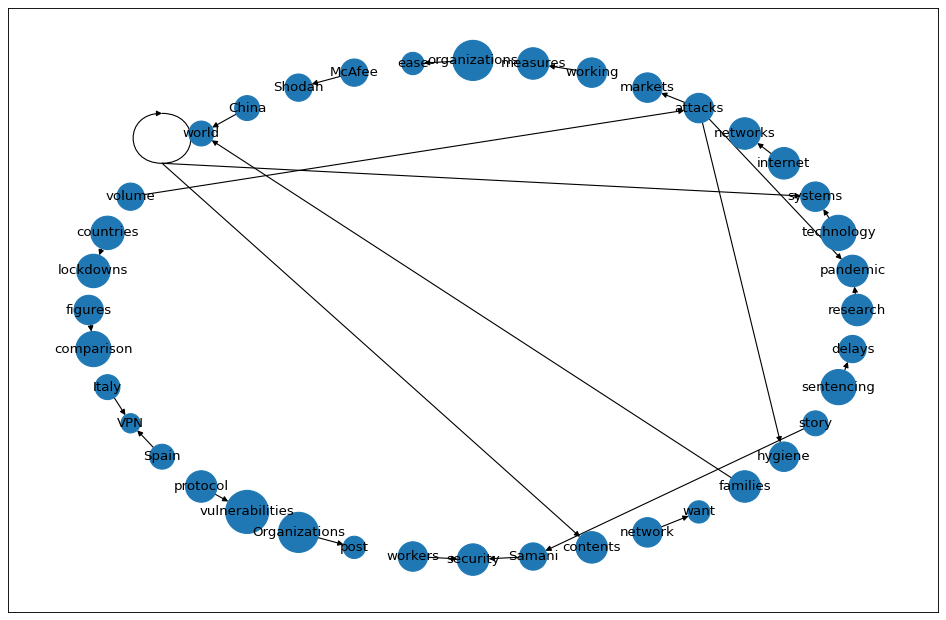

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

plt.tight_layout()

node_size = [100*len(i) for i in nodes]
pos = nx.circular_layout(graph_ex)
nx.draw_networkx(graph_ex, pos, arrows = True, node_size = node_size, with_labels = True)
plt.savefig("/content/drive/MyDrive/NLP-NER-DAG-master/output/dg_ex.png", format="PNG")

plt.show()